In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Tasla_Stock_Updated_V2.csv')
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [8]:
df.shape

(2274, 7)

In [9]:
df.describe()

,Unnamed: 0,Open,High,Low,Close,Volume
count,2274.000000,2274.000000,2274.000000,2274.000000,2274.000000,2.274000e+03
mean,1136.500000,103.493730,105.771617,101.036327,103.461794,1.142089e+08
std,656.591578,111.136174,113.606095,108.399966,111.032019,7.688430e+07
min,0.000000,9.488000,10.331333,9.403333,9.578000,1.062000e+07
25%,568.250000,16.669833,16.933332,16.468833,16.693666,6.637762e+07
50%,1136.500000,23.221334,23.554000,22.842334,23.197333,9.359855e+07
75%,1704.750000,215.272503,219.629173,208.983334,215.227497,1.338214e+08
max,2273.000000,411.470001,414.496674,405.666656,409.970001,9.140820e+08


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2274 non-null   int64  
 1   Date        2274 non-null   object 
 2   Open        2274 non-null   float64
 3   High        2274 non-null   float64
 4   Low         2274 non-null   float64
 5   Close       2274 non-null   float64
 6   Volume      2274 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 124.5+ KB


In [11]:
# Sort the stock data by date
df = df.sort_values(by = ['Date'])
df

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500
...,...,...,...,...,...,...,...
2269,2269,2024-01-09,238.110001,238.960007,232.039993,234.960007,96705700
2270,2270,2024-01-10,235.100006,235.500000,231.289993,233.940002,91628500
2271,2271,2024-01-11,230.570007,230.929993,225.369995,227.220001,105873600
2272,2272,2024-01-12,220.080002,225.339996,217.149994,218.889999,122889000


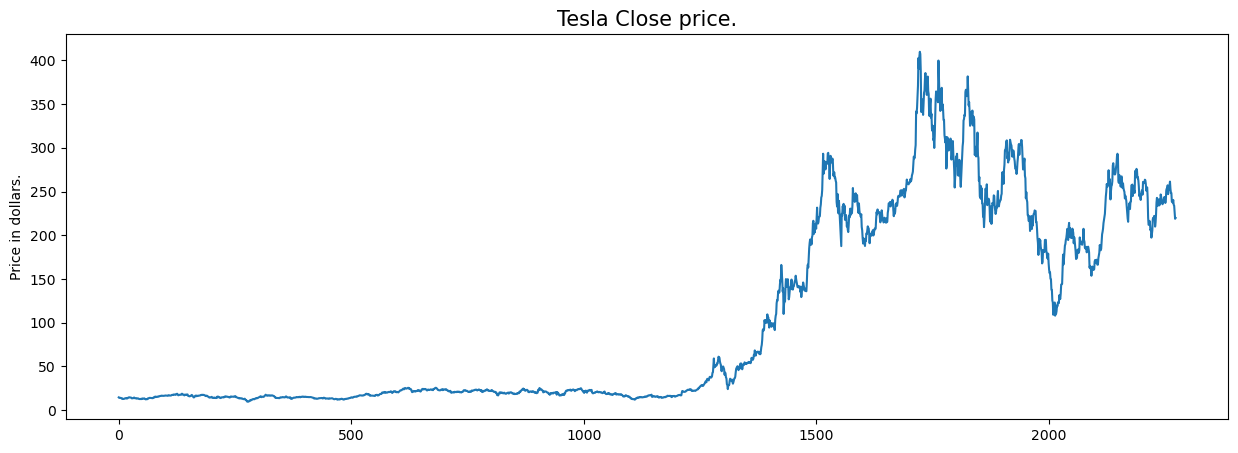

In [8]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [9]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


In [11]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

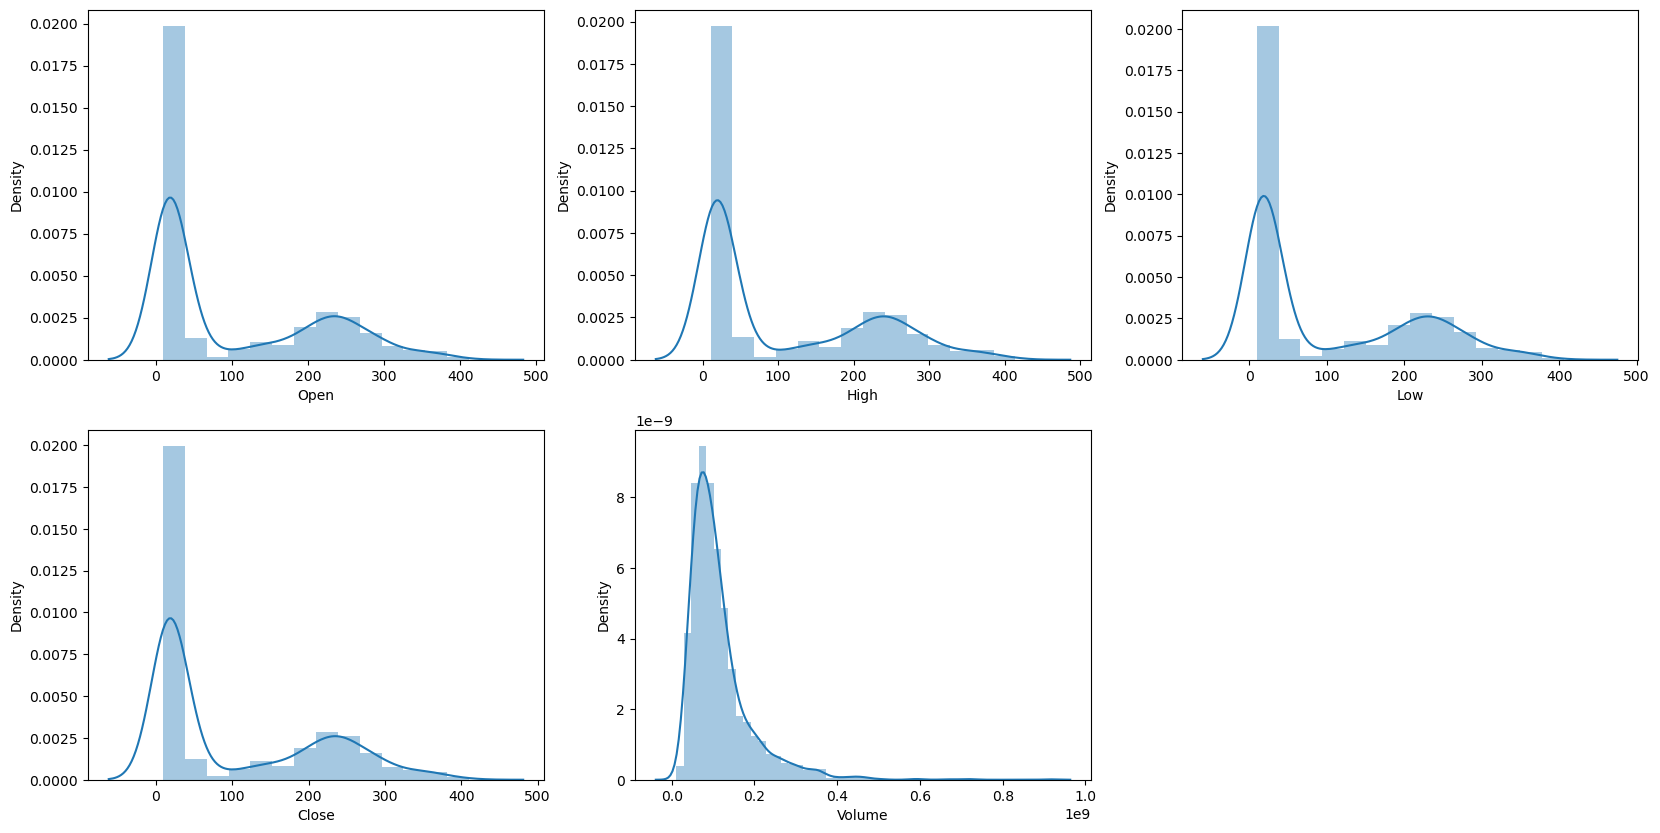

In [12]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(df[col])
plt.show()

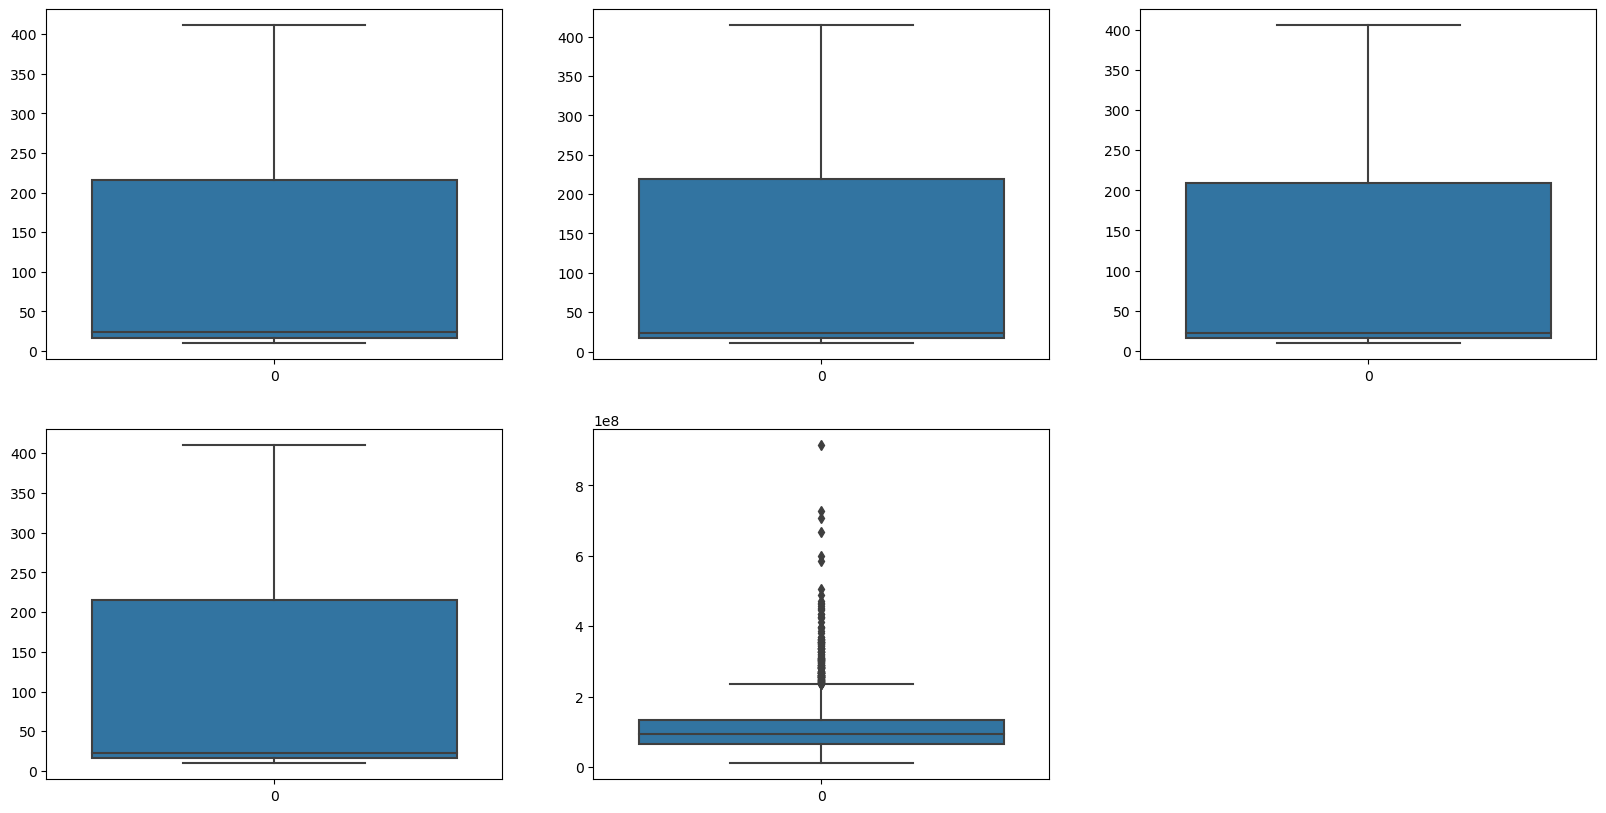

In [13]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(df[col])
plt.show()

In [21]:
splitted = df['Date'].str.split('/', expand=True)
splitted

,0
0,2015-01-02
1,2015-01-05
2,2015-01-06
3,2015-01-07
4,2015-01-08
...,...
2269,2024-01-09
2270,2024-01-10
2271,2024-01-11
2272,2024-01-12


In [32]:
df['day'] = pd.to_datetime(splitted[0]).dt.day
df['month'] = pd.to_datetime(splitted[0]).dt.month
df['year'] = pd.to_datetime(splitted[0]).dt.year
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,day,month,year
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,2,1,2015
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,5,1,2015
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500,6,1,2015
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000,7,1,2015
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500,8,1,2015


In [33]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000,2,1,2015,0
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500,5,1,2015,0
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500,6,1,2015,0
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000,7,1,2015,0
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500,8,1,2015,0


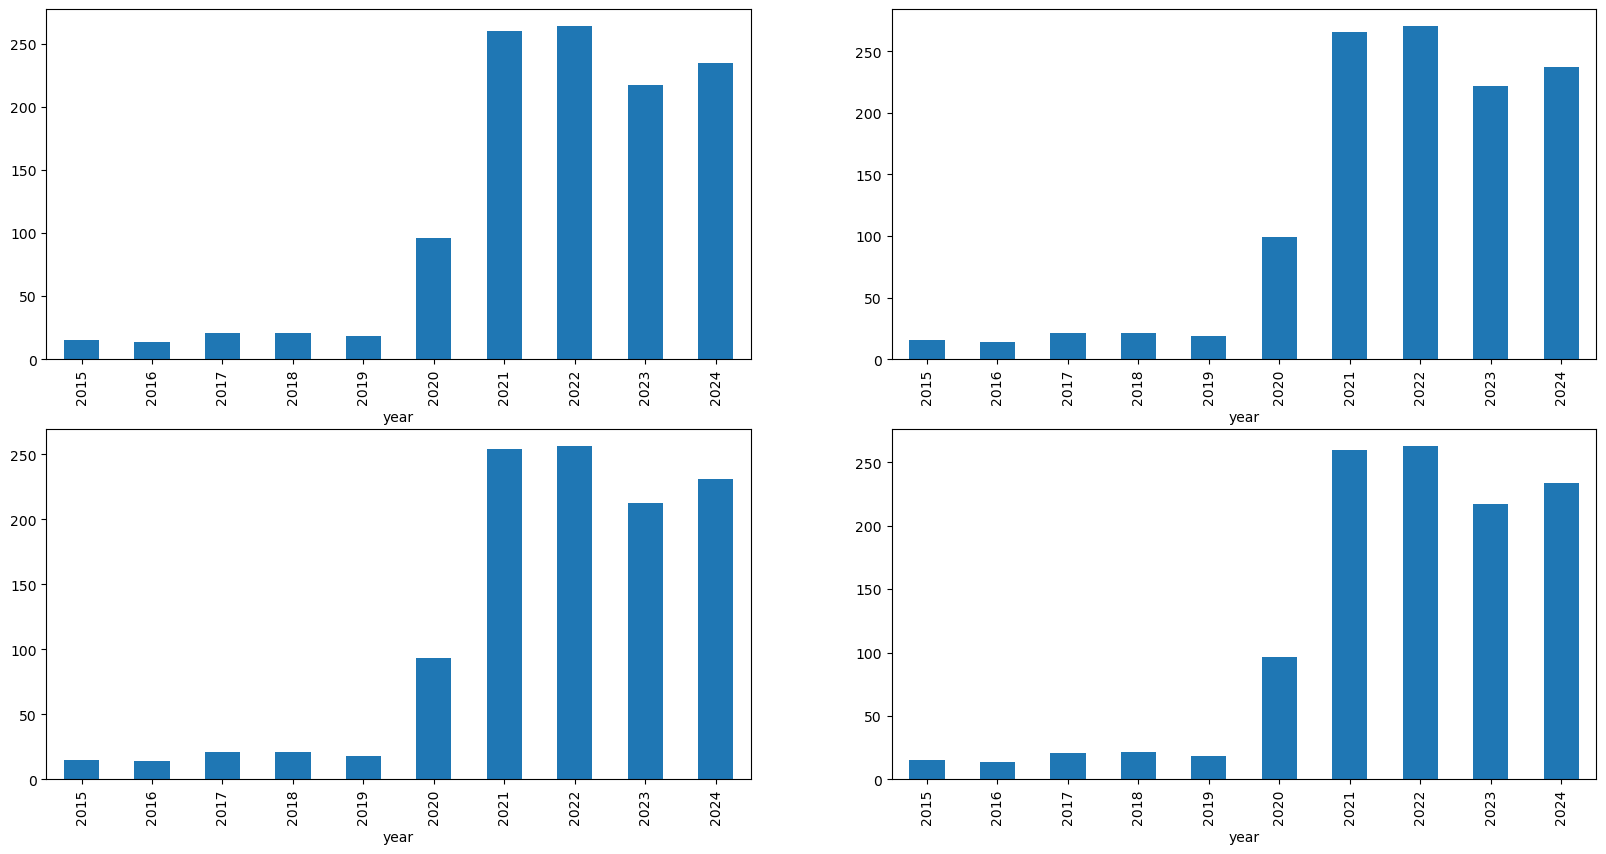

In [34]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [35]:
df.groupby('is_quarter_end').mean()

,Unnamed: 0,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,,
0,1129.288933,102.560809,104.819598,100.100976,102.495688,1.150026e+08,15.661365,6.070908,2019.027833
1,1150.724183,105.333962,107.649521,102.881353,105.367485,1.126431e+08,15.800000,7.411765,2019.001307


In [36]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

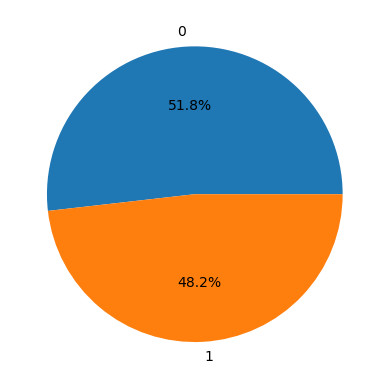

In [37]:
plt.pie(df['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

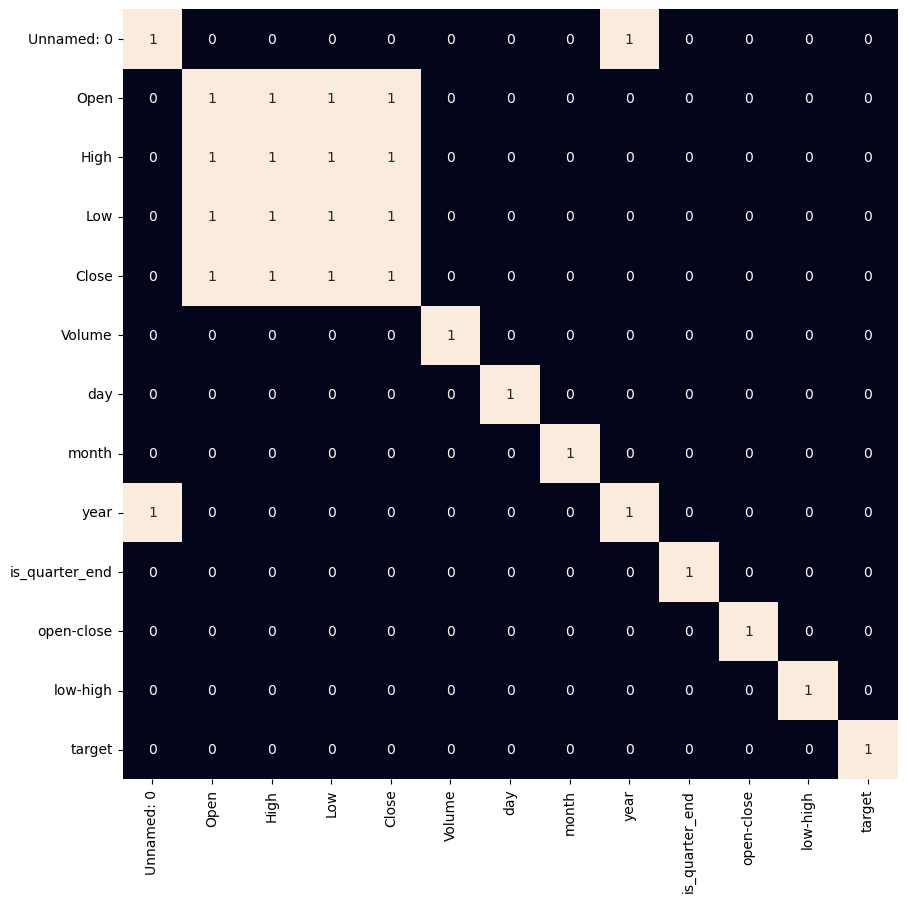

In [38]:
plt.figure(figsize=(10, 10))
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [39]:
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
 
scaler = StandardScaler()
features = scaler.fit_transform(features)
 
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)

(2046, 3) (228, 3)


In [41]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True)]
 
for i in range(2):
  models[i].fit(X_train, Y_train)
 
  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5026617934096215
Validation Accuracy :  0.6322033898305085

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5029756209575568
Validation Accuracy :  0.5949922958397534



In [4]:
from sklearn.metrics import plot_confusion_matrix
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\__init__.py)